In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Blending Images of the different sizes
* There are two methods of dealing with different sized images;
* **1)** Overlay small image on the top of a larger image (no blending) for a desired ROI(Region of Interest), using numpy re-assignment.
* **2)** Blending togather images of different sizes.

### Using Second Method

In [36]:
img = cv2.imread('../Data/dog_backpack.png')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Data/watermark_no_copy.png')
gray = img2.copy()
img2 = cv2.cvtColor(img2,cv2.COLOR_BGR2RGB)

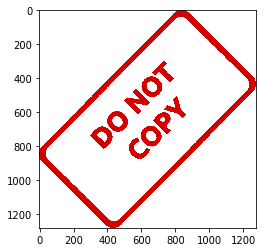

In [37]:
plt.imshow(img2)

In [58]:
img2 = cv2.resize(img2,(600,600))
gray = cv2.resize(img2,(600,600))

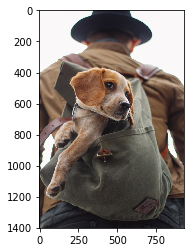

In [59]:
plt.imshow(img)

In [60]:
img.shape

(1401, 934, 3)

In [61]:
# first we need to select the region of interest
x_offset = 934 - 600 # (934 - 600(x-axis of img2) = 334 ) ----> 934 - 334 = 600 ( area of x axis we left with)
y_offset = 1401 - 600 # (1401 - 600(y-axis of img2) = 801) ----> 1401 - 801 = 600 ( area of y axis we left with)

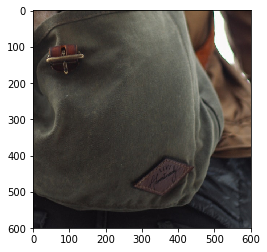

In [62]:
roi = img[y_offset:1401,x_offset:934]
plt.imshow(roi) # so this the area of 600x600 of img where we want to work with img2

In [63]:
rows,cols,channels = img2.shape

### Creating a Mask

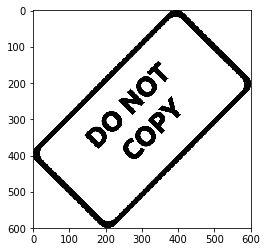

In [64]:
# now we need to create a mask
# I step is to convert an image to grayscale
mask = cv2.cvtColor(gray,cv2.COLOR_RGB2GRAY)
plt.imshow(mask,cmap='gray')

(600, 600)


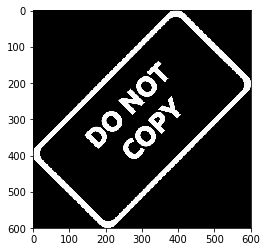

In [66]:
# Now what we actually need the inverse of the above image
# II Step is to invert the image
# because the black part will block the other picture
# for this we will use cv2.bitwise_not which will invert the input(in this case black to white and white to black)
mask_inv = cv2.bitwise_not(mask)
print(mask_inv.shape) # the image doesn't have 3 color channels now
plt.imshow(mask_inv,cmap='gray')

(600, 600, 3)


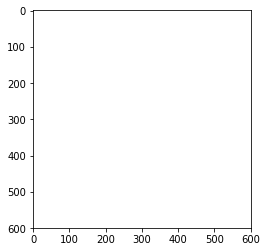

In [69]:
# since mask_inv is not having any colors but gray so we now need a blank picture with all 3 color channels 
# III step is to make a blank picture having all 3 color channels
white_background = np.full((600,600,3),255,dtype=np.uint8)
print(white_background.shape)
plt.imshow(white_background)

In [70]:
# IV step is to connect both images(Step II[mask] and Step III[white_bg]) using cv2.bitwise_or()
# cv2.bitwise_or will calculate the per-element bit-wise disjunction of two arrays (dst = src1 or src2) means where-ever the
# value of one of the array is same (i.e. 255 or 0 , 255 or 255) so the function will apply conjunction on that area and
# disjunction on other area.
# cv2.bitwise_or(src1, src, mask) we only need to work with these three parameters of bitwise_or
new_img = cv2.bitwise_or(white_background , white_background , mask = mask_inv)

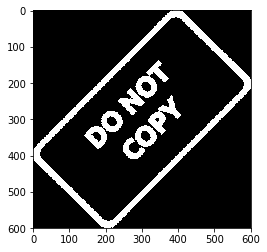

In [71]:
plt.imshow(new_img)